- 各个球队数据std基本在一个范围内，从直方图和箱形图中可以看出区别
- 换一个思路：不进行直接预测，对球队和比赛进行分类，然后预测的时候从历史数据库中挑选相似的比赛作为预测结果。这里的预测可以直接是比分，也可以是各个特征，然后用ML方法实现 特征->比分。
- plt.subplots()、plt.subplots_adjust()
- fig.set_figheight()、fig.set_figwidth()
- ax.hlines()、ax.set_title()、ax.hist()
- plt.boxplot()

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
files = ["../数据收集/"+f for f in os.listdir('../数据收集') if ".xlsx" in f and "games" not in f]
pts_std = {}
for f in files:
    df = pd.read_excel(f)
    pts_std[df['TEAM_NAME'][0]]=df[['FG3M','AST','PTS','FGM','FGA','FG3A','REB']]

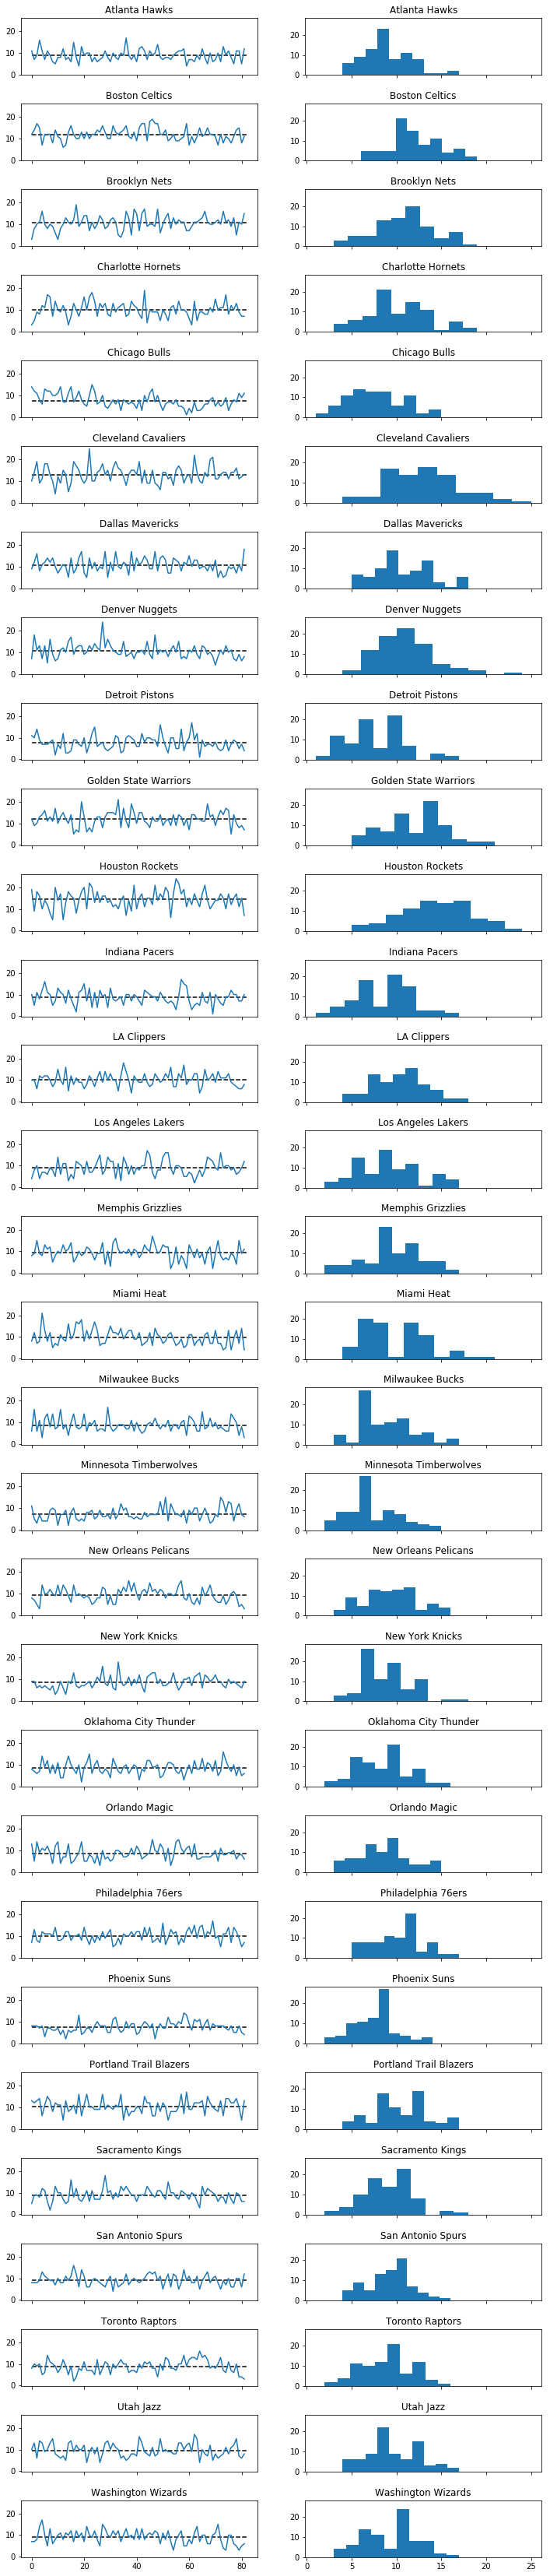

In [3]:
f,axes = plt.subplots(30,2,sharex='col',sharey='col')
plt.subplots_adjust(hspace=0.5)
f.set_figheight(60)
f.set_figwidth(12)
for i,(key,value) in enumerate(pts_std.items()):
    ax = axes[i,0]
    ax.plot(value['FG3M'])
    #ax.add_line(Line2D([0,82],[value['FG3M'].mean(),value['FG3M'].mean()],c='red',linestyle='--'))
    ax.hlines(value['FG3M'].mean(),0,82,linestyles='--')
    ax.set_title(key)
    
    ax2=axes[i,1]
    ax2.hist(value['FG3M'])
    ax2.set_title(key)

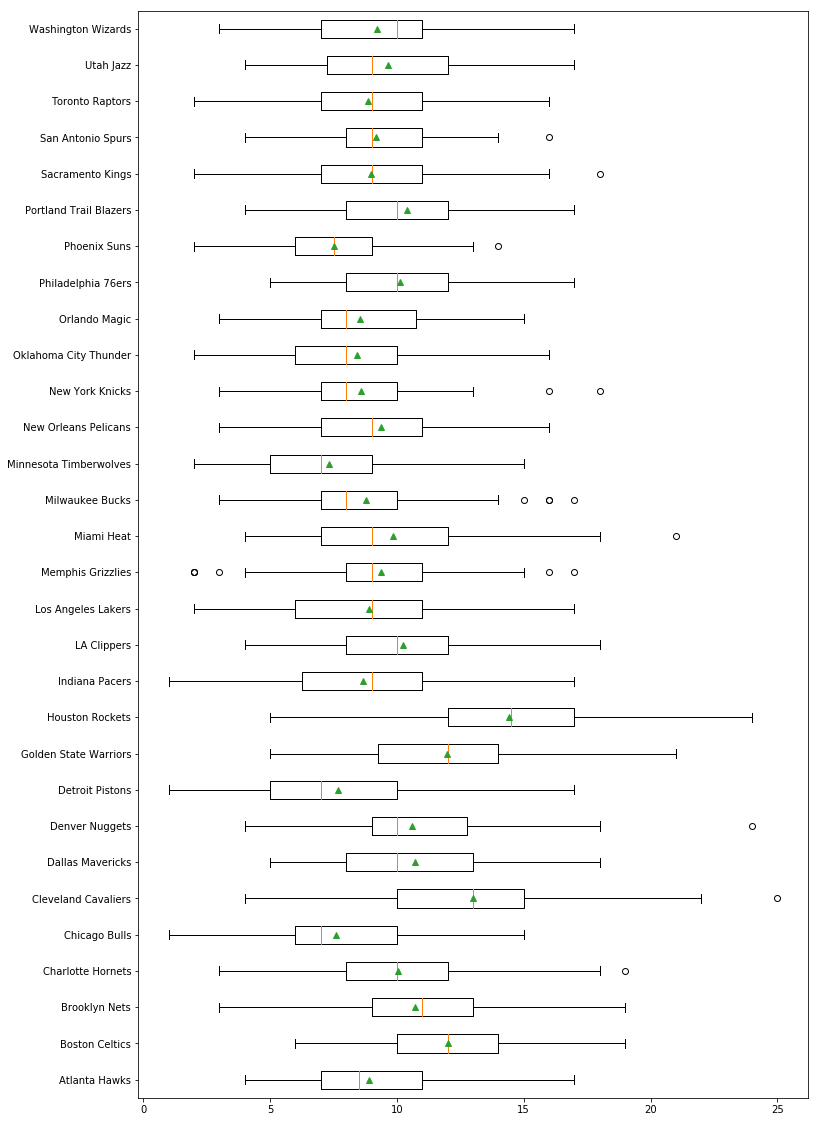

In [4]:
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(12)
plt.boxplot([d['FG3M'] for d in pts_std.values()],vert=False,labels=pts_std.keys(),showmeans=True)
plt.show()